In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re
import os

## Data cleaning and manipulation

Insert the path to the projet files

In [2]:
os.chdir("C:/Users/Martin/Desktop/skola/CERGE/PV_Names/")
memorial_data = pd.read_stata("./MemorialData/MemorialTrainingSetFinal.dta")

Here we create a dictionary that maps the root of the russian terms for the ethnic groups in the datasets to their english trnaslations

In [3]:
ethnicities_dict = {
    'башкир':'bashkir',
    'татар':'tatar',
    'каза':'kazah',
    'азербайдж':'azeri',
    'балкар':'balkar',
    'карача':'karachaev',
    'кумык':'kumyk',
    'ногай':'nogai',
    'туркмен':'turkmen',
    'чечен':'vainah',
    'кабард':'kabard',
    'черкес':'cherkes',
    'осетин':'osetin',
    'алта':'altai',
  #  'удмурт':'udmurt',  Dropping them due to their very high correlation with russian names
  #  'карел':'karel',    
  #  'чуваш':'chuvash',
  #  'саха':'saha',
    'калмы':'kalmyk',
    'бурят':'buryat',
    'армян':'armyan',
    'груз':'georg',
    'евре':'jewish',
    'русс':'russian',
    'белорус':'belarussian',
    'украин':'ukrainian'
             }
memorial_ethnicities = memorial_data.nation.tolist()

In [4]:
items  = ethnicities_dict.items() #iteritems return an iterator over our dictionary’s (key, value) pairs
ethnicity = ["no match"] * len(memorial_ethnicities)


for i in range(len(memorial_ethnicities)):
    for russian_ethnicity_name, enghlish_ethnicity_name in items:
        if re.match(russian_ethnicity_name, memorial_ethnicities[i], re.IGNORECASE):
            ethnicity[i] = enghlish_ethnicity_name
            break

In [5]:
memorial_data["ethnicity"] = ethnicity

The results are saved in the ethnicity column.

In [3]:
memorial_data.head(10)

,Unnamed: 0,surn,name,patr,nation,first_names,birthyear,ethnicity,ethnicity_col
0,0,Сокурова,Абидат,Ибрагимовна,балкарка,Абидат Ибрагимовна,1938,balkar,turkic_all
1,1,Сокурова,Алимат,Мухажировна,балкарка,Алимат Мухажировна,1940,balkar,turkic_all
2,2,Сокурова,Аминат,Заурбековна,балкарка,Аминат Заурбековна,1894,balkar,turkic_all
3,3,Сокурова,Аслиджан,Шомаловна,кабардинка,Аслиджан Шомаловна,1939,kabard,kabard_cherkes
4,4,Сокурова,Валентина,Сулеймановна,балкарка,Валентина Сулеймановна,1955,balkar,turkic_all
5,5,Сокурова,Гемха,NaN,балкарка,Гемха,1905,balkar,turkic_all
6,6,Сокурова,Зулижан,Ильясовна,балкарка,Зулижан Ильясовна,1937,balkar,turkic_all
7,7,Сокурова,Кыралжан,Хажахматовна,балкарка,Кыралжан Хажахматовна,1935,balkar,turkic_all
8,8,Сокурова,Мария,Хаждаутовна,балкарка,Мария Хаждаутовна,1947,balkar,turkic_all
9,9,Сокурова,Мариям,Азоковна,балкарка,Мариям Азоковна,1895,balkar,turkic_all


*What number of observations per ethnicity is too low for inclusion?*

In [7]:
(memorial_data.groupby(['ethnicity'])
 .size().reset_index(name='counts').sort_values("counts", ascending=False))

,ethnicity,counts
18,russian,631906
15,no match,250453
5,belarussian,76408
21,ukrainian,61524
3,balkar,50260
13,kazah,37460
9,jewish,34691
19,tatar,33498
4,bashkir,8535
6,buryat,6213


Ethnic groups that so far were not included.

* *Which should be included (Mordvins, Poles ...?)?*
* *Which should be not included(Germans, Greeks ... ?)?*

Drop Chuvash Saha
Include Altai

In [8]:
(memorial_data[memorial_data["ethnicity"] == "no match"]
 .groupby("nation").size()
 .reset_index(name='counts').sort_values("counts", ascending=False).head(40))

,nation,counts
151,поляк,57651
122,немец,45710
131,немка,30107
162,поляки,29629
91,латыш,13921
141,полька,13673
74,китаец,8703
201,эстонец,8349
135,немцы,6346
118,мордвин,6043


Count the number of surnames for each ethnic group

In [9]:
agg_by_surname = (memorial_data.groupby(['surn', 'ethnicity'])
 .size().reset_index(name='counts')
 .pivot_table(index='surn', columns='ethnicity', values='counts', fill_value=0)
 .sort_values(by=('russian'), ascending=False))

agg_by_surname.head(5)

ethnicity,altai,armyan,azeri,balkar,bashkir,belarussian,buryat,cherkes,georg,jewish,...,kazah,kumyk,no match,nogai,osetin,russian,tatar,turkmen,ukrainian,vainah
surn,,,,,,,,,,,,,,,,,,,,,
Иванов,14,2,0,0,0,302,54,0,2,4,...,8,0,556,0,0,10717,46,0,84,0
Кузнецов,0,0,0,0,2,40,0,0,0,18,...,4,0,164,0,0,6094,16,0,20,0
Васильев,10,0,0,0,0,100,46,0,0,2,...,4,0,281,0,0,5488,34,0,42,0
Попов,0,4,0,0,0,42,4,0,2,0,...,0,0,186,0,0,5121,14,0,62,0
Петров,2,2,0,0,0,68,8,0,0,0,...,2,0,278,0,0,4690,48,0,32,0


Create a matrix with correlation coefficients of names for every pair of ethnic groups.

In [77]:
corr_matrix = agg_by_surname.reset_index().rename(columns={"ethnicity": "ethnicity2"}).drop(['surn'], axis=1).corr()
corr_matrix.index = corr_matrix.index.set_names(['ethnicity_rows'])

corr_matrix_long = pd.melt(corr_matrix.reset_index(), id_vars=['ethnicity_rows'])
links = corr_matrix.stack().reset_index()
links.columns = ['ethnicity1', 'ethnicity2','name_corr']
links_filtered=links.loc[ (links['name_corr'] > 0.3) & (links['ethnicity1'] != links['ethnicity2']) ]
links_filtered
import networkx as nx
import matplotlib.pyplot as plt

G=nx.from_pandas_edgelist(links_filtered, 'ethnicity1', 'ethnicity2')
nx.draw(G, with_labels=True)
plt.show()


C:\Users\Martin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 640x480 with 1 Axes>

Subset of ethnictiy pairs with correlation higher than 0.3

In [84]:
links_filtered.drop_duplicates(subset = "name_corr").sort_values("name_corr", ascending=False)

,ethnicity1,ethnicity2,name_corr
95,bashkir,tatar,0.787306
343,karel,russian,0.760807
472,russian,udmurt,0.717055
469,russian,saha,0.623028
347,karel,udmurt,0.609891
344,karel,saha,0.548791
497,saha,udmurt,0.516135
118,belarussian,russian,0.430900
136,buryat,kalmyk,0.374002
123,belarussian,ukrainian,0.348933


High correlation between between Tatar and Bashkir names (expected) but also between Russian and Udmurt and Saha (somewhat surprising due to their linguistic dissimilarity)

### Collapsing the ethnicities

In [6]:
import itertools

turkic_ethn_1 = ['bashkir', 'tatar', 'kazah']
turkic_ethn_2 = ['balkar', 'karachaev', 'azeri', 'kumyk', 'nogai', 'turkmen']

memorial_data['ethnicity_col'] = np.where(memorial_data['ethnicity'].isin(list(itertools.chain(*[turkic_ethn_1, turkic_ethn_2]))), 'turkic_all', memorial_data['ethnicity'])
memorial_data['ethnicity_col'] = np.where(memorial_data['ethnicity'].isin(['kalmyk', 'buryat']), 'mongol', memorial_data['ethnicity_col'])
memorial_data['ethnicity_col'] = np.where(memorial_data['ethnicity'].isin(['russian', 'belarussian', 'ukrainian']), 'slavic', memorial_data['ethnicity_col'])
memorial_data['ethnicity_col'] = np.where(memorial_data['ethnicity'].isin(['kabard', 'cherkes']), 'kabard_cherkes', memorial_data['ethnicity_col'])


#(memorial_data.groupby(['ethnicity_col'])
 #.size().reset_index(name='counts').sort_values("counts", ascending=False))

In [8]:
memorial_data.to_csv('./MemorialData/memorial_data_final.csv')

In [2]:
memorial_data = pd.read_csv('./MemorialData/memorial_data_final.csv')

In [7]:
counts_df = (memorial_data.groupby(['ethnicity_col'])
 .size().reset_index(name='counts').sort_values("counts", ascending=False))
counts_df

,ethnicity_col,counts
8,slavic,769838
6,no match,250453
9,turkic_all,130737
3,jewish,34691
5,mongol,11160
4,kabard_cherkes,6232
1,armyan,3387
7,osetin,3335
0,altai,2041
2,georg,1714


In [37]:
counts_df.index.to_series()
#counts_df.reset_index().apply(lambda c: c.counts/(c.counts).sum())
col_ethn_rel_freq = counts_df.sort_index().counts/counts_df.sort_index().counts.sum() 

## Fitting the model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report,confusion_matrix



### No collapsing of ethnic groups

In [5]:
X = memorial_data["surn"]
memorial_data.ethnicity = memorial_data.ethnicity.astype('category')
y = memorial_data.ethnicity.cat.codes


Split the data on test and train datasets.

In [5]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, stratify=y)

Fit two models: calibrated that attempts to probably calibrate the confidence of the model's predictions (the probabilities) and uncalibrated one. 

In [7]:
model = make_pipeline(CountVectorizer(), MultinomialNB(alpha=0.005))
model_cal = make_pipeline(CountVectorizer(), CalibratedClassifierCV(MultinomialNB(alpha=0.005) ,method='isotonic',cv=5))

In [15]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test) # to predict probability

In [16]:
model_cal.fit(X_train, y_train)
y_pred_cal = model_cal.predict(X_test)
probs_cal = model_cal.predict_proba(X_test) 

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

target_names = list(memorial_data.ethnicity.astype('category').cat.categories)
print(classification_report(y_test, y_pred, target_names=target_names))


C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      armyan       0.90      0.53      0.67       677
       azeri       0.27      0.05      0.08        65
      balkar       0.95      0.93      0.94     10052
     bashkir       0.61      0.20      0.31      1707
 belarussian       0.58      0.43      0.50     15282
      buryat       0.83      0.62      0.71      1243
     cherkes       1.00      0.11      0.20        18
     chuvash       0.00      0.00      0.00         5
       georg       0.92      0.43      0.59       343
      jewish       0.80      0.51      0.62      6938
      kabard       0.83      0.71      0.77      1228
      kalmyk       0.92      0.52      0.66       990
   karachaev       0.40      0.04      0.07        51
       karel       0.79      0.10      0.18      1062
       kazah       0.88      0.61      0.72      7492
       kumyk       0.40      0.07      0.12        27
    no match       0.82      0.72      0.76     48272
       nogai       0.00    

In [20]:
print(classification_report(y_test, y_pred_cal, target_names=target_names))

              precision    recall  f1-score   support

      armyan       0.90      0.53      0.67       677
       azeri       0.27      0.05      0.08        65
      balkar       0.96      0.93      0.94     10052
     bashkir       0.63      0.19      0.29      1707
 belarussian       0.60      0.41      0.49     15282
      buryat       0.83      0.62      0.71      1243
     cherkes       1.00      0.11      0.20        18
     chuvash       0.00      0.00      0.00         5
       georg       0.92      0.44      0.60       343
      jewish       0.80      0.51      0.62      6938
      kabard       0.82      0.73      0.77      1228
      kalmyk       0.93      0.52      0.66       990
   karachaev       0.40      0.04      0.07        51
       karel       0.82      0.10      0.17      1062
       kazah       0.88      0.61      0.72      7492
       kumyk       0.38      0.11      0.17        27
    no match       0.81      0.73      0.77     48272
       nogai       0.00    

### Collapsed ethnic groups

In [8]:
memorial_data.ethnicity_col = memorial_data.ethnicity_col.astype('category')
y_col = memorial_data.ethnicity_col.cat.codes
X_train,  X_test, y_train, y_test = train_test_split(X, y_col, test_size=0.2, random_state=2020, stratify=y_col)
model_cal.fit(X_train, y_train)
y_pred_cal = model_cal.predict(X_test)
probs_cal = model_cal.predict_proba(X_test) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test) # to predict probability


target_names = list(memorial_data.ethnicity_col.astype('category').cat.categories)
print(classification_report(y_test, y_pred_cal, target_names=target_names))


                precision    recall  f1-score   support

         altai       0.91      0.38      0.53       408
        armyan       0.90      0.54      0.68       678
         georg       0.88      0.47      0.61       343
        jewish       0.83      0.50      0.62      6938
kabard_cherkes       0.84      0.69      0.76      1246
        mongol       0.91      0.58      0.71      2232
      no match       0.85      0.66      0.74     50091
        osetin       0.89      0.64      0.75       667
        slavic       0.86      0.97      0.91    153968
    turkic_all       0.95      0.83      0.89     26147
        vainah       0.78      0.24      0.36       191

      accuracy                           0.86    242909
     macro avg       0.87      0.59      0.69    242909
  weighted avg       0.87      0.86      0.86    242909



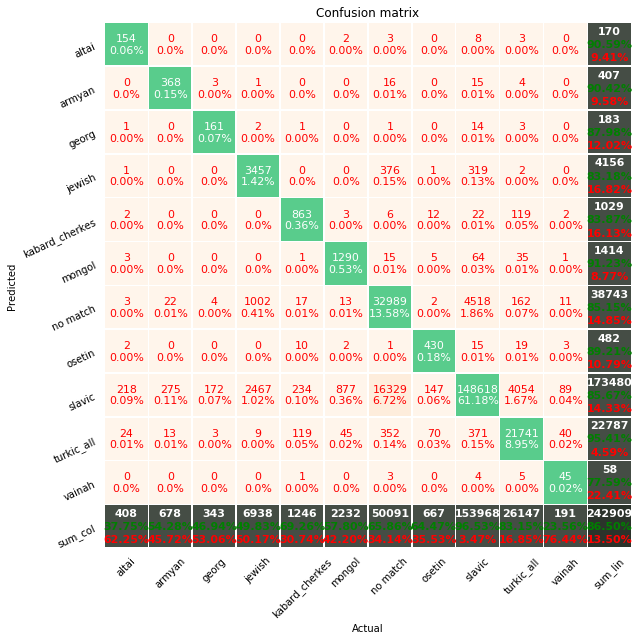

In [33]:
import confusion_matrix_pretty_print as cm
cm.plot_confusion_matrix_from_data(y_test, y_pred_cal, columns=target_names, figsize=[32, 32], fz=13)

We see that the main problem is that many individuals from other ethnic groups (mongol, jewish, georgian, etc.) are disproportiantely predicted as slavic. 

Do we at least have well calibrated probabilities?

In [65]:
from sklearn.calibration import calibration_curve
from sklearn.isotonic import IsotonicRegression
from keras.utils.np_utils import to_categorical

y_test_cat = to_categorical(y_test)


cal_list = list()
noncal_list = list()

for i in range(probs.shape[1]):
    (prob_true, prob_pred) = calibration_curve(y_test_cat[:, i], probs_cal[:, i], n_bins=10, normalize=True)
    cal_list.append((prob_true, prob_pred)) 
    (prob_true, prob_pred) = calibration_curve(y_test_cat[:, i], probs[:, i], n_bins=10, normalize=True)
    noncal_list.append((prob_true, prob_pred))

Using TensorFlow backend.


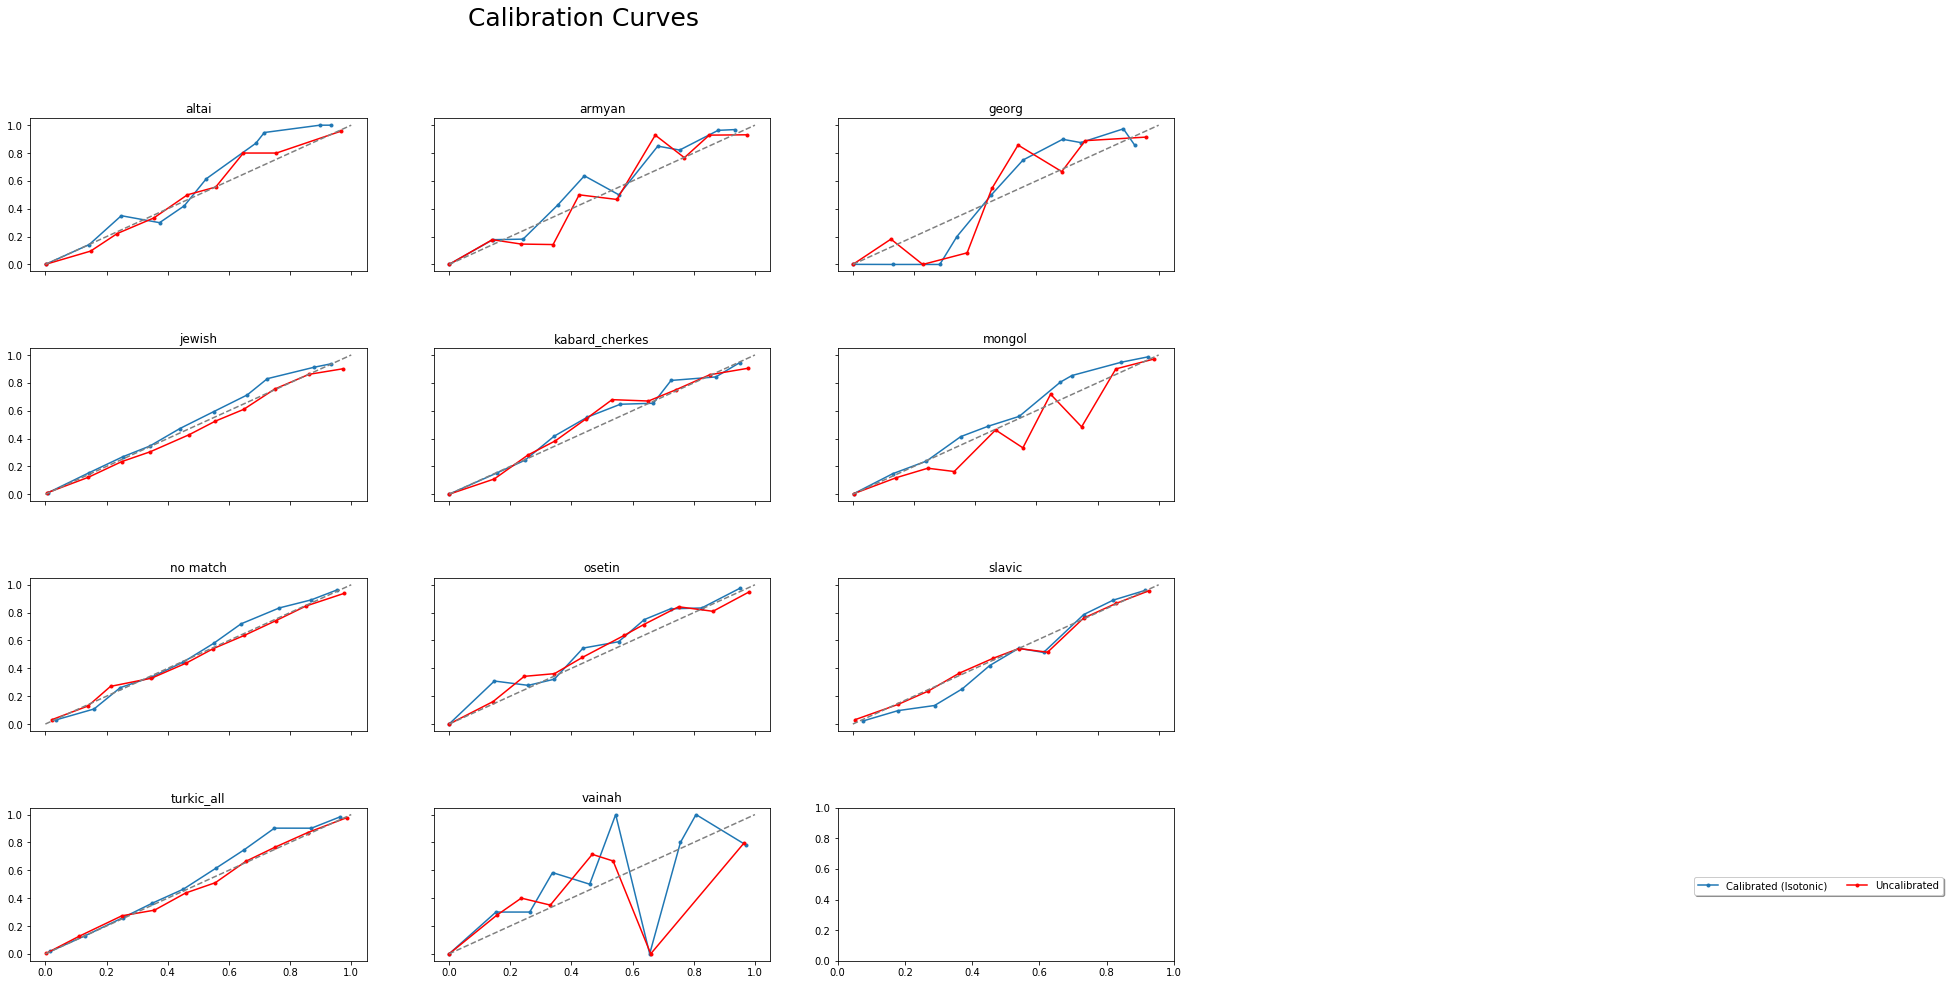

In [78]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(20.5, 15.5, forward=True)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Calibration Curves', fontsize=25)

for ax, data_var, data_var_noncal, ethn_names in zip(axes.flatten(), cal_list, noncal_list, target_names):
    ax.plot(data_var[1], data_var[0], marker='.', label='Calibrated (Isotonic)')
    ax.plot(data_var_noncal[1], data_var_noncal[0], marker='.', color='red', label='Uncalibrated')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.label_outer()
    ax.set(title=ethn_names)

#fig.delaxes(axes[5][6])
#fig.delaxes(axes[5][5])
#axes[5,4].set_axis_off()
#axes[5,3].set_axis_off()
#plt.gca().legend()
ax.legend(loc='lower right', bbox_to_anchor=(4.5, 0.4), ncol=3, fancybox=True, shadow=True)
plt.show()


Mostly yes, except for the small ethnic group.

Will sampling ethnicities according to their posterior probabilities help?

In [ ]:
y_pred_cal_final = model_cal.predict(X_test)
probs_cal_final = model_cal.predict_proba(X[event_preds["prediction"] == 1])


In [81]:
def sample_preds(probs_matrix = probs_cal, target_vect = target_names):
    sim_pred = np.empty([probs_matrix.shape[0], 1])
    
    for i in range(probs_matrix.shape[0]):
        sim_pred[i, :] = np.random.choice(range(len(target_vect)), size=None, p=probs_matrix[i, ])
        
    return sim_pred

y_pred_sim = sample_preds()

#### Uniform prior

One possible solution is to use uniform prior (i.e likelihood will dominate) or to otherwise adjust the prior 'against' the slavic ethnicity.

In [61]:
adjustment = 0.40  # We substract 0.4 from the prior on slavic ethnicity and add this proportionatly to all group
col_ethn_rel_freq = counts_df.sort_index().counts/counts_df.sort_index().counts.sum() 
col_ethn_rel_freq_adj = col_ethn_rel_freq
col_ethn_rel_freq_adj[8] = col_ethn_rel_freq[8] - adjustment
col_ethn_rel_freq_adj = col_ethn_rel_freq_adj + (adjustment/len(col_ethn_rel_freq_adj))
col_ethn_rel_freq_adj = col_ethn_rel_freq_adj.tolist()
col_ethn_rel_freq_adj
uniform_prior = len(col_ethn_rel_freq) * [(1/len(col_ethn_rel_freq))]

In [59]:
model_cal_adj_prior = make_pipeline(CountVectorizer(), CalibratedClassifierCV(MultinomialNB(alpha=0.005, fit_prior=False, class_prior=uniform_prior) ,method='isotonic',cv=5))

model_cal_adj_prior.fit(X_train, y_train)
y_pred_cal = model_cal_adj_prior.predict(X_test)
probs_cal = model_cal_adj_prior.predict_proba(X_test) 

print(classification_report(y_test, y_pred_cal, target_names=target_names))



                precision    recall  f1-score   support

         altai       0.72      0.41      0.52       408
        armyan       0.86      0.56      0.68       678
         georg       0.84      0.47      0.60       343
        jewish       0.73      0.56      0.63      6938
kabard_cherkes       0.73      0.75      0.74      1246
        mongol       0.88      0.58      0.70      2232
      no match       0.87      0.64      0.73     50091
        osetin       0.79      0.70      0.75       667
        slavic       0.85      0.96      0.91    153968
    turkic_all       0.95      0.83      0.88     26147
        vainah       0.62      0.34      0.44       191

      accuracy                           0.86    242909
     macro avg       0.80      0.62      0.69    242909
  weighted avg       0.86      0.86      0.85    242909



C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible inste

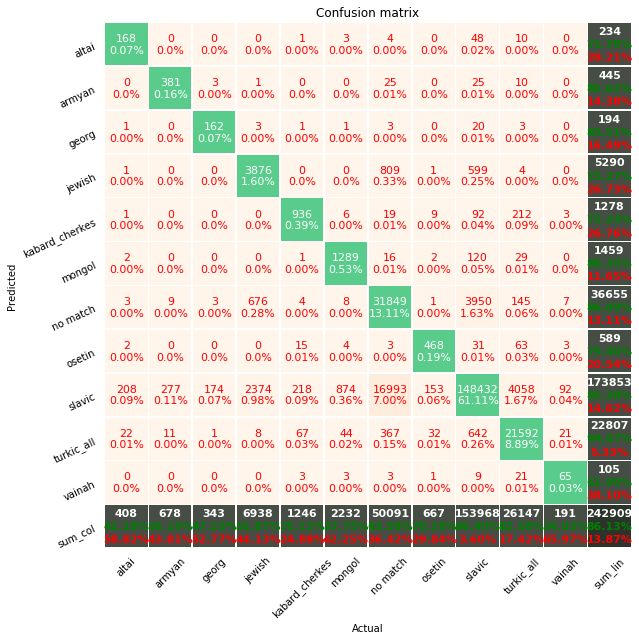

In [60]:
import confusion_matrix_pretty_print as cm
cm.plot_confusion_matrix_from_data(y_test, y_pred_cal, columns=target_names, figsize=[32, 32], fz=13)

The result is not much better...

#### Oversampling of underrepresented ethnic groups

In [41]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

memorial_data.surn = memorial_data.surn.astype('category')
X_cat = memorial_data.surn.cat.codes

X_train,  X_test, y_train, y_test = train_test_split(X, y_col, test_size=0.2, random_state=2020, stratify=y)

rus = RandomUnderSampler(random_state=2020)
ros = RandomOverSampler(random_state=2020)


X_train_resampled, y_train_resampled = ros.fit_resample(X_train.array.to_numpy().reshape(-1, 1), y_train.array)
#X_resampled, y_resampled = ros.fit_resample(X_cat.array.to_numpy().reshape(-1, 1), y_col.array)

In [42]:
#X_train,  X_test, y_train, y_test = train_test_split(pd.DataFrame(X_resampled, columns = ["X"]).X.astype(str), y_resampled, test_size=0.2, random_state=2020, stratify=y_resampled)
model_cal.fit(pd.DataFrame(X_train_resampled, columns = ["X"]).X.astype(str), y_train_resampled)
#model_cal.fit(X_train_resampled, y_train_resampled)

y_pred_cal = model_cal.predict(pd.DataFrame(X_test.array.to_numpy().reshape(-1, 1), columns = ["X"]).X.astype(str))
probs_cal = model_cal.predict_proba(pd.DataFrame(X_test.array.to_numpy().reshape(-1, 1), columns = ["X"]).X.astype(str)) 

In [44]:
print(classification_report(y_test, y_pred_cal, target_names=target_names))

                precision    recall  f1-score   support

         altai       0.06      0.55      0.11       408
        armyan       0.19      0.59      0.28       678
         georg       0.22      0.45      0.30       343
        jewish       0.42      0.64      0.50      6938
kabard_cherkes       0.49      0.78      0.61      1246
        mongol       0.22      0.67      0.33      2233
      no match       0.60      0.82      0.69     50091
        osetin       0.35      0.78      0.49       667
        slavic       0.95      0.76      0.84    153968
    turkic_all       0.93      0.78      0.85     26146
        vainah       0.05      0.40      0.09       191

      accuracy                           0.77    242909
     macro avg       0.41      0.66      0.46    242909
  weighted avg       0.84      0.77      0.79    242909



C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
C:\Users\Martin\Desktop\skola\CERGE\PV_Names\confusion_matrix_pretty_print.py:169: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible inste

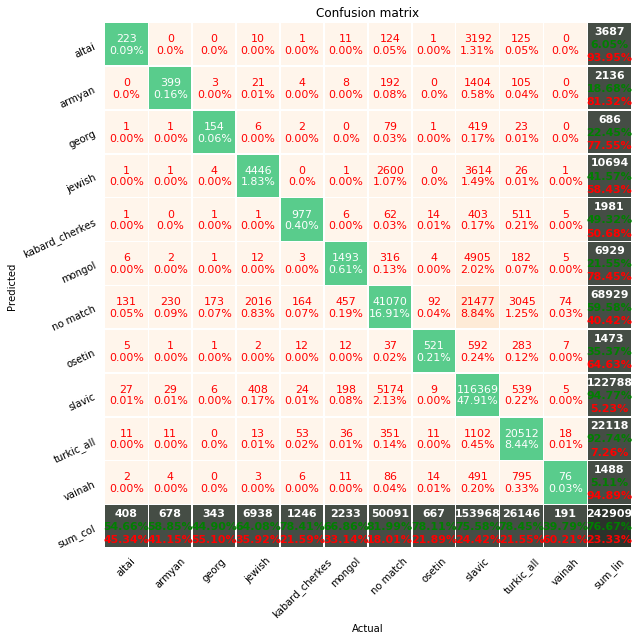

In [45]:
import confusion_matrix_pretty_print as cm
cm.plot_confusion_matrix_from_data(y_test, y_pred_cal, columns=target_names, figsize=[32, 32], fz=13)

Does not help that much either. It no longer 'over-predict' slavic ethnicity but instead it overpredicts 'no match' (maybe we should exclude no-match?).

##### Exclude 'No-match'

In [49]:
memorial_data_excl_nm = memorial_data[memorial_data["ethnicity_col"] != 'no match']

X_excl_nm = memorial_data_excl_nm["surn"]
memorial_data_excl_nm.ethnicity_col = memorial_data_excl_nm.ethnicity_col.astype('category')
y_col_excl_nm = memorial_data_excl_nm.ethnicity_col.cat.codes


X_train,  X_test, y_train, y_test = train_test_split(X_excl_nm, y_col_excl_nm, test_size=0.2, random_state=2020, stratify=y)

C:\Users\Martin\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


ValueError: Found input variables with inconsistent numbers of samples: [964092, 1214545]